# Without sWeights: `common_Dst_constr_B0toDstDsWithmu2Free_BDT-1.25u{1,2};{i}`

# Fit the complete data
WITH A LOOP IMPLEMENTED
This file is fitting for different cuts on the BDT variable

In the `fit_common_uncertainties.ipynb`, the fixed parameters of the (1) $D^*\pi\pi\pi$ and (2) $D^*K\pi\pi$  distributions have been changed within their uncertainty intervals, according to a gaussian. $n_sig$ have been computed for each of this variation.

The goal of this documend is 
- plotting the two $n_{sig}$ distributions.
    - **Mode 1**: $n_{sig}$ distribution by varying the tail parameters of $D^*\pi\pi\pi$
    - **Mode 2**: $n_{sig}$ distribution by varying all the parameters of $D^*K\pi\pi$ 
- plotting the changed parameters in these 2 modes
- computed the systematic uncertainty, which is the quadratic sum of the standard deviation of the $n_{sig}$ distributionobtained with the 2 modes

## Import

In [1]:
from uncertainties import unumpy as unp
from uncertainties import ufloat

from math import sqrt
import numpy as np

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)

from load_save_data import retrieve_params, format_previous_params
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


## Names of the datasets

In [9]:
name_data_common = 'common_Dst_constrHEP'
BDT = -1.25

name_data_MC = 'MC_constr_opposedCB_sharedMean'
name_data_KPiPi = "data_KPiPi_constr"

name_data = f'{name_data_common}_BDT{BDT}'

## Load data

### Name of the parameters

In [2]:
name_params_KPiPi = {
    'alphaL_Kpipi'           : '$\\alpha_{L, D^* K\\pi\\pi}$',
    'alphaR_Kpipi'           : '$\\alpha_{R, D^* K\\pi\\pi}$',
    'nL_Kpipi'               : '$n_{L, D^* K\\pi\\pi}$',
    'nR_Kpipi'               : '$n_{R, D^* K\\pi\\pi}$',
    'fraction_Kpipi'         : '$f_{\\frac{L}{R},D^* K\\pi\\pi}$',
    'muL_Kpipi'              : '$\\mu_{L, D^* K\\pi\\pi}$',
    'sigmaL_Kpipi'           : '$\\sigma_{L, D^* K\\pi\\pi}$',
    'muR_Kpipi'              : '$\\mu_{R, D^* K\\pi\\pi}$',
    'sigmaR_Kpipi'           : '$\\sigma_{R, D^* K\\pi\\pi}$',
}

name_params = {
    # Signal
    'mu'      : '$\\mu_S$',
    'sigmaL'  : '$\\sigma_{L,S}$',
    'sigmaR'  : '$\\sigma_{R,S}$',    
    'alphaL'  : '$\\alpha_{L,S}$',
    'alphaR'  : '$\\alpha_{R,S}$',
    'nL'      : '$n_{L,S}$',
    'nR'      : '$n_{R,S}$',
    'fraction': '$f_{\\frac{L}{R},S}$',
    'n_sig'   : '$n_{B^0 \\to D^* 3\\pi}$',
    'frac': '$f_{\\frac{L}{R},S}$',
    'r_bkgK'  : '$\\frac{n_{B^0 \\to D^*K\\pi\\pi}}{n_{B^0 \\to D^* 3\\pi}}$',
}

In [3]:
name_params_dic = {}
name_params_dic['1'] = name_params
name_params_dic['2'] = name_params_KPiPi
name_params_dic['2']['r_bkgK'] = name_params_dic['1']['r_bkgK']

### Start and end indices of mode 1 and mode 2

In [12]:
starts = {}
ends = {}
# Mode 1
starts['1'] = 0
ends['1'] = 1596

# Mode 2
starts['2'] = 0
ends['2'] = 1380

### Statistical uncertainty

In [13]:
n_sig_opt = retrieve_params(f"{name_data}", name_folder=name_data_common)[f'n_sig|BDT{BDT}']
n_sig_opt_err = retrieve_params(f"{name_data}", name_folder=name_data_common)[f'n_sig|BDT{BDT}_err']
print('optimal n_sig =', n_sig_opt)

optimal n_sig = 51358.013306884655


### Nominal values of the parameters that were changed in mode 1 and 2

In [14]:
saved_params = {}

## Retrieve the nominal value of the floated parameters in mode 1 and 2 (saved_params) ===========================
# Fixed nR
MC_params = retrieve_params(name_data_MC, name_folder='MC')
saved_params['MC'] = {}
for key, value in MC_params.items():
    if not key.endswith('_err'):
        saved_params['MC'][key[:-3]] = value

# fixed B0->DstKPiPi
Kpipi_params = format_previous_params(retrieve_params(name_data_KPiPi, name_folder='data_KPiPi')) # already in MeV 
saved_params['Kpipi'] = {}
for key, value in Kpipi_params.items():
    if not key.endswith('_err'):
        saved_params['Kpipi'][key + '_Kpipi'] = value

# common with BDT cut (for starting values of the fit)
saved_params['pipipi'] = format_previous_params(retrieve_params(name_data_common, name_folder=name_data_common))

# key = Parameters that were changed in modes 1 and 2
# value = corresponding PDF ('pipipi' = B0->Dst 3pi and 'Kpipi' = B0-> Dst K pi pi)
params_mode = {}
params_mode['1'] = {'alphaR': 'pipipi', 'nR':'MC', 'alphaL': 'pipipi', 'nL':'pipipi'}
params_mode['2'] = {'r_bkgK': 'pipipi'}
for key in saved_params['Kpipi'].keys():
        params_mode['2'][key] = 'Kpipi'

## Check that I did not forget a parameter in params_mode ========================================
all_params = list(params_mode['1'].keys()) + list(params_mode['2'].keys()) # all the parameters that were changed in mode 1 and 2

# Result of the fit of index 18
result_fit = {}
result_fit['1'] = retrieve_params(f"{name_data}u1;18", name_folder=name_data)
result_fit['2'] = retrieve_params(f"{name_data}u2;18", name_folder=name_data)
for m in '1', '2':
    r_params = result_fit[m]['r_params']
    for param in r_params.keys():
        assert param in all_params, print(list(r_params.keys()), all_params)
        # assert that the floated parameter of one of the fit in mode 1/2 is in all_params 



### Retrieve the results of the fits which converged

In [ ]:
def test_mode(r_params, mode):
    """ Test that I did what I wanted to do during the mode 1 and 2, i.e.
    check that in a result of fit of a given mode, the right parameters have been changed
    and the other parameters are fixed
    
    @r_params   :: result of the fit (saved in the json file)
    @mode       :: '1' or '2', mode associated of the fit
    
    @returns    :: True, if changed the good parameters and fixed the other parameters
    """
    file_ok = True
    for amode in params_mode.keys(): # loop on the modes
        
        # if this is the mode of the fit the corresponding parameters must have changed
        if amode==mode:
            for param, file in params_mode[amode].items():
                if saved_params[file][param]==r_params[param]:
                    print(f'Error in param {param} ; should change')
                    file_ok = False
        # if not, the corresponding variables of the mode must not have changed 
        else:
            for param, file in params_mode[amode].items():
                if param not in saved_params[file]:
                    print(f'{param} not in saved_params[file]')
                    print(saved_params[file])
                elif param not in r_params:
                    print(f'{param} not in r_params')
                    print(r_params)
                if saved_params[file][param]!=r_params[param]:
                    print(f'Error in param {param} ; should not change')
                    file_ok = False
    return file_ok

In [16]:
# dictionnary of the fitted systematic n_sig for the modes 1 and 2
n_sig_u = {}
n_sig_u['1'] = []
n_sig_u['2'] = []

n_sig = {}
n_sig['1'] = []
n_sig['2'] = []

# dictionnary of the parameters that were changed during mode 1 and 2
parameters = {'1' : {}, '2': {}}
for m in '1', '2':
    for param in params_mode[m]:
            parameters[m][param] = []


# list of the fits that are not ok
fit_not_ok = {}
fit_not_ok['1'] = []
fit_not_ok['2'] = []

for m in '1', '2':
    print(f'load mode {m}')
    for i in range(starts[m], ends[m]):
        # retrieve the result of the fit of index i
        result_fit = retrieve_params(f"{name_data}u{m};{i}", name_folder=name_data)
        # check that the fit is ok. In this case, add it to the n_sig list
        if result_fit['fit_ok'] and 'True' not in result_fit['info_params']:
            n_sig_u[m].append(ufloat(result_fit[f'n_sig;{i}'], result_fit[f'n_sig;{i}_err']))
            n_sig[m].append(result_fit[f'n_sig;{i}'])
        else:
            print(f'Fit number {i} not ok')
            if 'True' in result_fit['info_params']:
                print("(params at lim)")
                print(result_fit['info_params'])
            fit_not_ok[m].append(i)
        
        if 'r_params' in result_fit:
            test_ok = test_mode(result_fit['r_params'], m)
            if not test_ok:
                print(f'error in {i}')
        else:
            print(f'r_params not in {i}')
            
        for param in params_mode[m]:
            parameters[m][param].append(result_fit['r_params'][param])
        
n_sig['1'] = np.array(n_sig['1'])
n_sig['2'] = np.array(n_sig['2'])

load mode 1
Fit number 46 not ok
Fit number 138 not ok
Fit number 191 not ok
Fit number 192 not ok
Fit number 366 not ok
Fit number 368 not ok
Fit number 513 not ok
Fit number 573 not ok
Fit number 577 not ok
Fit number 596 not ok
Fit number 663 not ok
Fit number 774 not ok
Fit number 797 not ok
Fit number 842 not ok
Fit number 943 not ok
Fit number 1028 not ok
Fit number 1189 not ok
Fit number 1239 not ok
Fit number 1285 not ok
Fit number 1559 not ok
load mode 2
Fit number 23 not ok
Fit number 100 not ok
Fit number 181 not ok
Fit number 285 not ok
Fit number 527 not ok
Fit number 595 not ok
Fit number 599 not ok
Fit number 629 not ok
Fit number 1075 not ok
Fit number 1125 not ok
Fit number 1156 not ok
Fit number 1170 not ok
Fit number 1196 not ok
Fit number 1215 not ok
Fit number 1300 not ok
Fit number 1356 not ok


## Distribution of $n_{B^0\to D^*3\pi}$ obtained with mode 1 and mode 2

In [17]:
colors = {}
colors['1'] = 'green'
colors['2'] = 'saddlebrown'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/modes


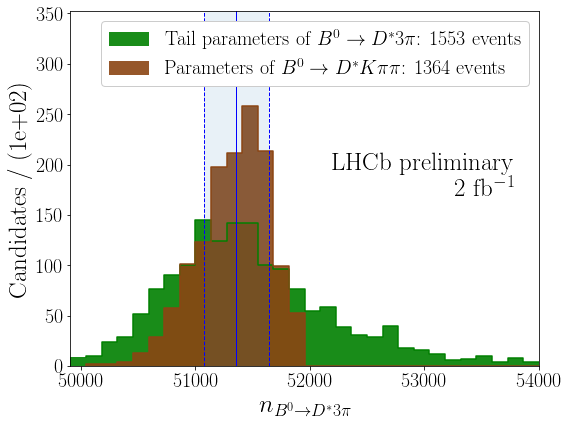

In [18]:
fig, ax = h.plot_hist_var([unp.nominal_values(n_sig['1']), unp.nominal_values(n_sig['2'])], 'signal_yield', '$n_{B^0 \\to D^*3\\pi}$',
               name_datas = ['Tail parameters of $B^0 \\to D^* 3\pi$', 'Parameters of $B^0 \\to D^* K \pi\pi$'],
              name_folder=name_data, n_bins=30, mode_hist=True, density=False, colors=list(colors.values()),
                         pos_text_LHC=[0.95, 0.6, 'right'], high=54000, save_fig=False, alpha=0.9)
ax.axvline(x=n_sig_opt, color='blue', linewidth=1.)
ax.axvspan(n_sig_opt-n_sig_opt_err, n_sig_opt+n_sig_opt_err, alpha=0.1)
ax.axvline(x=n_sig_opt-n_sig_opt_err, color='blue', linewidth=1., linestyle='--')
ax.axvline(x=n_sig_opt+n_sig_opt_err, color='blue', linewidth=1., linestyle='--')
ax.legend(fontsize=20, framealpha=1)

save_file(fig, f'modes', name_folder=name_data)

## Distribution of the variables that were changed in mode 1 and mode 2

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/alphaR_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/nR_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/alphaL_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/nL_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/r_bkgK_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/alphaL_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/alphaR_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/fraction_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/muL_Kpipi_mode2
/afs/cern.ch/user/c/correian/bd

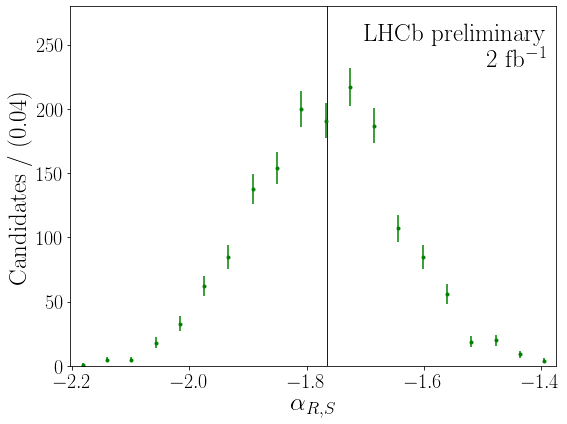

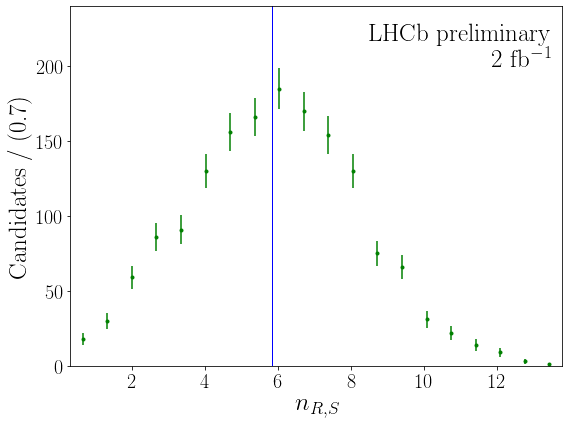

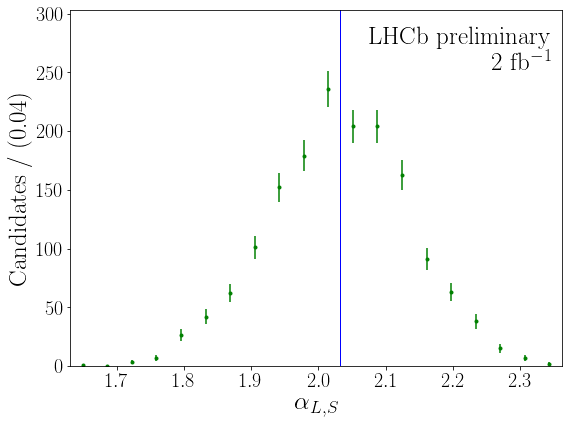

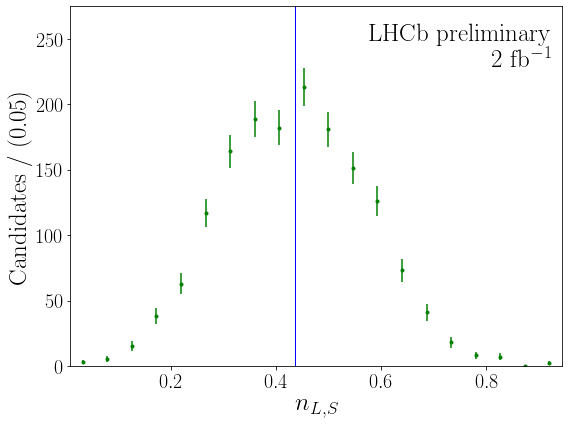

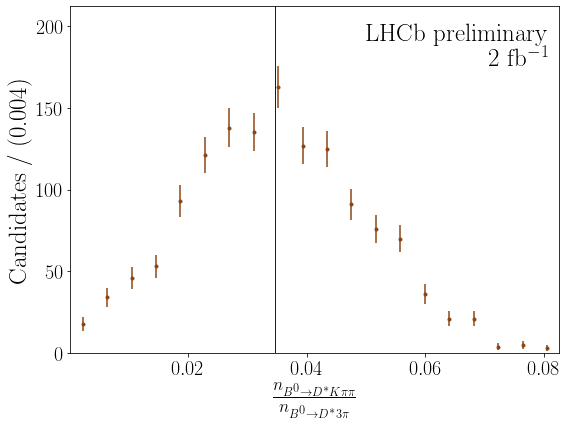

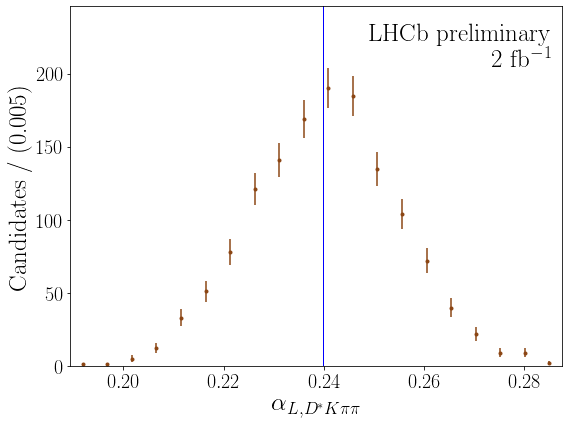

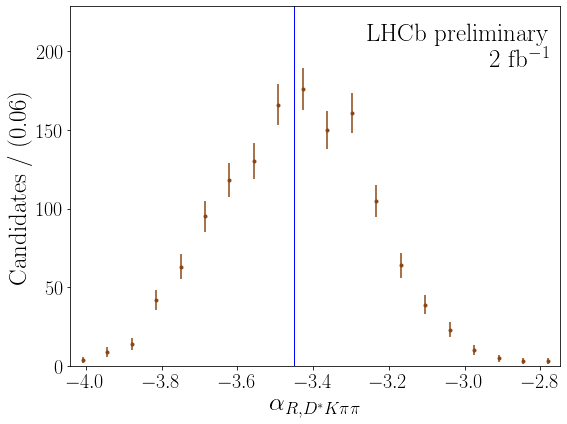

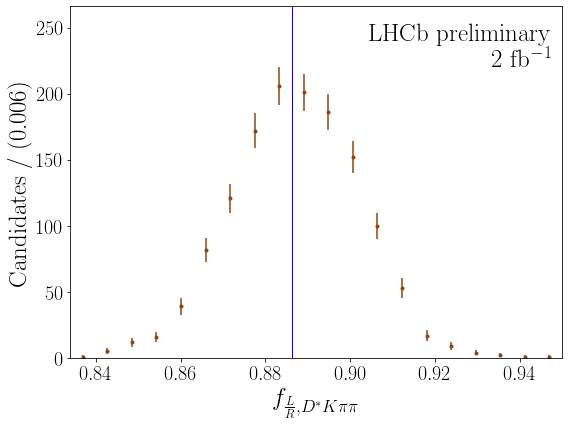

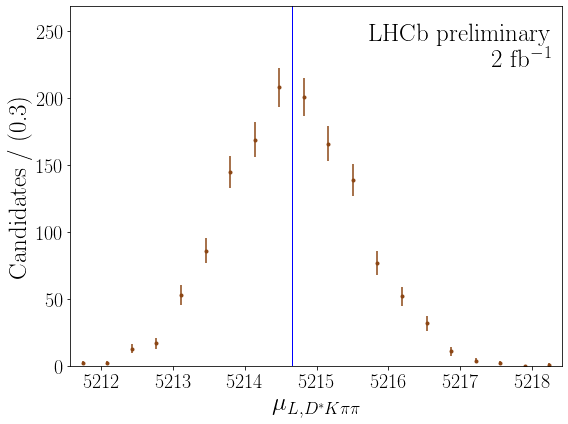

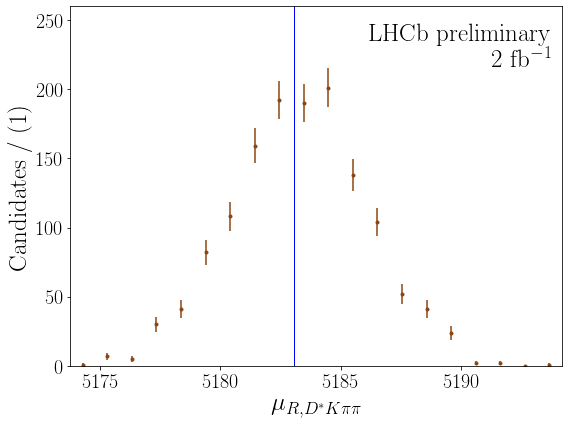

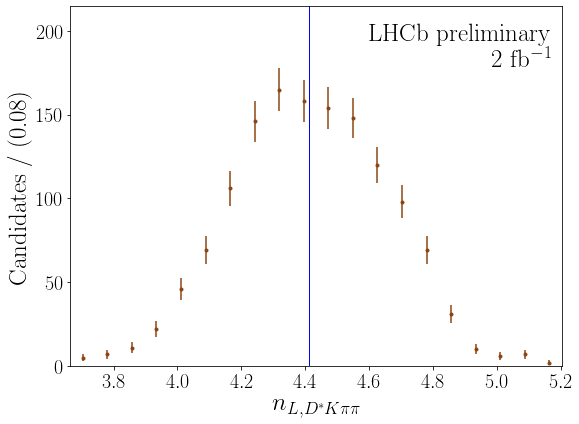

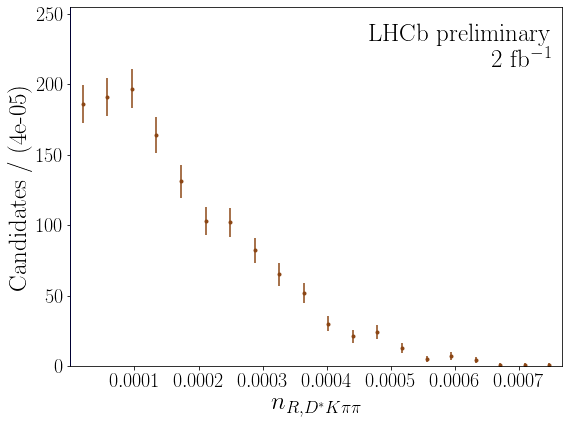

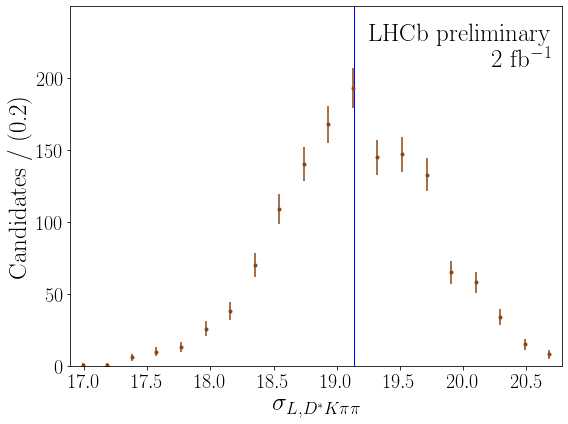

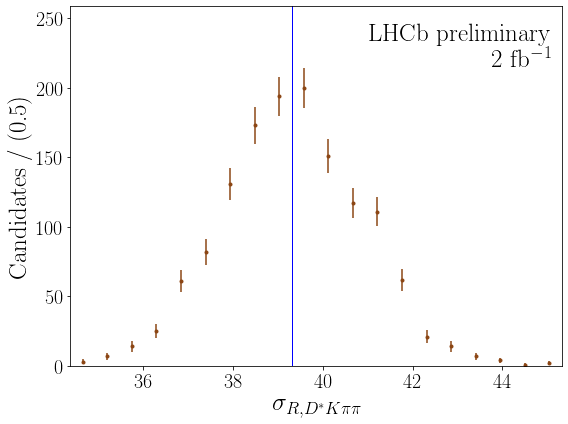

In [19]:
for m in '1', '2':
    for name_param, data_param in parameters[m].items():
        fig, ax = h.plot_hist_var(data_param, name_param, name_variable = name_params_dic[m][name_param],
               name_datas = f'mode {m}',
              name_folder=f'{name_data}/parameters', n_bins=20, mode_hist=False, colors=colors[m],
                         pos_text_LHC='right', save_fig=False)
        file = params_mode[m][name_param]
        ax.axvline(x=saved_params[file][name_param], color='blue', linewidth=1.)
        save_file(fig, name_file =f'{name_param}_mode{m}', name_folder=f'{name_data}/parameters')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/parameters/nR_Kpipi_mode2


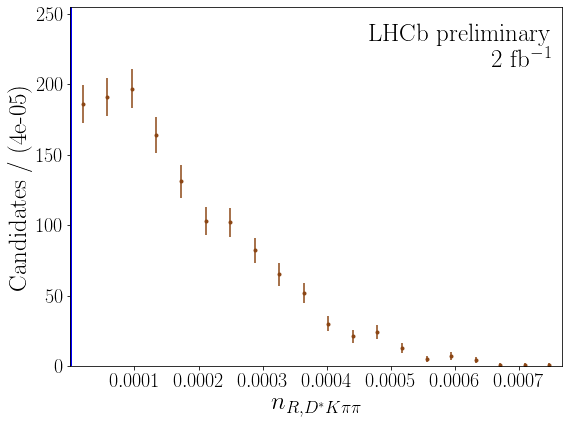

In [32]:
m = '2'
name_param = 'nR_Kpipi'
data_param = parameters[m][name_param]

fig, ax = h.plot_hist_var(data_param, name_param, name_variable = name_params_dic[m][name_param],
       name_datas = f'mode {m}',
      name_folder=f'{name_data}/parameters', n_bins=20, mode_hist=False, colors=colors[m],
                 pos_text_LHC='right', save_fig=False)
file = params_mode[m][name_param]
ax.axvline(x=saved_params[file][name_param], color='blue', linewidth=3.)
save_file(fig, name_file =f'{name_param}_mode{m}', name_folder=f'{name_data}/parameters')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/S_mode1
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constrHEP_BDT-1.25/n_sig_mode1


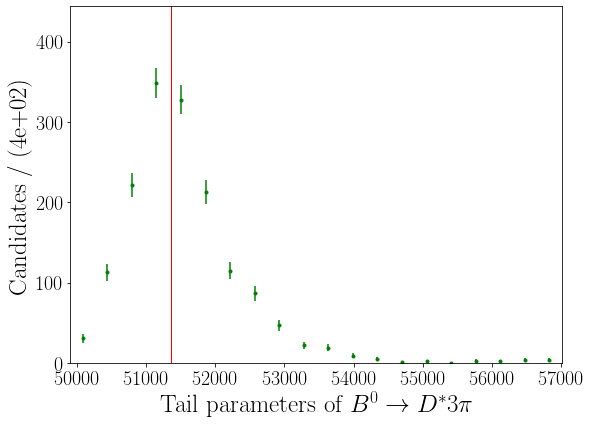

In [33]:
fig, ax = h.plot_hist_var(unp.nominal_values(n_sig['1']), 'S',
               'Tail parameters of $B^0 \\to D^* 3\pi$',
                name_datas='mode1',
                n_bins=20,
              name_folder=name_data, colors=colors['1'])
ax.axvline(x=n_sig_opt, color='red', linewidth=1.)
save_file(fig, f'n_sig_mode1', name_folder=name_data)

In [35]:
print(min(n_sig['1']), max(n_sig['1']))
print(min(n_sig['2']), max(n_sig['2']))

49907.8435612784 57008.428286391965
50081.46557599594 51939.9102122354


## COMPUTATION WITH `np.std`

### Standard deviation of mode 1 and mode 2

In [24]:
n_std = {}
n_std['1'] = np.std(n_sig['1'])
n_std['2'] = np.std(n_sig['2'])
print(n_std['1'])
print(n_std['2'])

873.0610390879084
306.0507697957602


### Total standard deviation of the two modes, = systematic uncertainty

In [ ]:
sigma_np = sqrt(n_std['1']**2+n_std['2']**2)

In [26]:
print(sigma_np)

925.1500698080479


### systematic uncertainty compared to the yield

In [27]:
sigma_np/n_sig_opt

0.018013743333097923

### normalisation mode yield and statistical uncertainty

In [28]:
n_sig_opt

51358.013306884655

In [29]:
n_sig_opt_err

281.29155447457447

### total uncertainty (statistical + systematic)

In [30]:
sigma_tot = sqrt(sigma_np**2+n_sig_opt_err**2)

In [31]:
sigma_tot

966.9682467819501